In [1]:
import tellurium as te
import pandas as pd
from xlink_kme_sbml.library import sbml_sim_helper, sbml_constants, sbml_plot_lib, sbml_xl
import altair as alt
import seaborn as sns
import numpy as np

In [2]:
xl_str = "Crosslinker"

In [3]:
def apply_custom_params(rr, params_dict):
    rr.resetToOrigin()
    for k,v in params_dict.items():
        setattr(rr, k, v)

In [4]:
def get_sim_res(rr, last_frame_only=True, sim_time=1000, custom_params={}):
    params_dict = get_params_dict_equal_lys_react(rr, custom_params=custom_params)
    apply_custom_params(rr, params_dict)
    results = rr.simulate(0, sim_time, points=100)
    df_res = pd.DataFrame(results, columns=results.colnames) 
    df_res = df_res.drop(columns=[col for col in df_res.columns if "v" in col])
    for col in df_res.columns:
        df_res.columns = df_res.columns.str.replace("\[|\]", "", regex=True)
    n_lys = int(len(sbml_sim_helper.get_rr_const_dict(rr, 'LYS'))/3)
    for n in range(1, n_lys + 1):
        df_res[f"MonoSum_{n}"] = df_res[f"Mono_{n}"] + df_res[f"MonoHydro_{n}"]
    if last_frame_only:
        df_melt = pd.melt(df_res.tail(1), id_vars='time')
    else:
        df_melt = pd.melt(df_res, id_vars='time')
    df_melt["type"] = df_melt["variable"].str.split("_", expand=True)[0]
    return df_melt

In [5]:
def get_params_dict_equal_lys_react(rr, p_klys=1e-1, p_kon_xl=5e7, custom_params={}):
    params_dict = {'kh': 2.5e-4, 'kon': 1e7, 'koff': 1e8}
    klys_dict = sbml_sim_helper.get_rr_const_dict(rr, 'klys')
    for klys in klys_dict.keys(): 
        params_dict[klys] = p_klys
    kon_xl_dict = sbml_sim_helper.get_rr_const_dict(rr, 'kon_xl')
    for konxl in kon_xl_dict.keys():
        pos1, pos2 = konxl.split("_")[2:4]
        pos1, pos2 = int(pos1), int(pos2)
        params_dict[konxl] = p_kon_xl
    if custom_params:
        params_dict = {**params_dict, **custom_params}
    return params_dict

In [7]:
rr_3lys = te.loadAntimonyModel("model_3lys_n.txt")

In [41]:
params_3lys_3xl = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 2.5e-4, 'koff': 1e9}, p_kon_xl=8e7)
params_3lys_3xl_lower_klys1 = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 2.5e-4, 'koff': 1e9, 'klys_1': 1e-2}, p_kon_xl=8e7)
params_3lys_3xl_even_lower_klys1 = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 2.5e-4, 'koff': 1e9, 'klys_1': 1e-3}, p_kon_xl=8e7)
params_3lys_3xl_lower_klys1_2 = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 2.5e-4, 'koff': 1e9, 'klys_1': 1e-2, 'klys_2': 1e-2}, p_kon_xl=8e7)
params_3lys_3xl_high_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 0.01, 'koff': 1e9}, p_kon_xl=8e7)
params_3lys_3xl_lower_klys1_high_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 0.01, 'koff': 1e9, 'klys_1': 1e-2}, p_kon_xl=8e7)
params_3lys_3xl_lower_klys1_2_high_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={xl_str: 3, 'kon': 1e7, 'kh': 0.01, 'koff': 1e9, 'klys_1': 1e-2, 'klys_2': 1e-2}, p_kon_xl=8e7)
params_3lys_3xl_low_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={'kh': 2.5e-5}, p_kon_xl=9e7, p_klys=0.5)
params_3lys_3xl_lower_klys1_low_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={'kh': 2.5e-5, 'klys_1': 5e-2}, p_kon_xl=9e7, p_klys=0.5)
params_3lys_3xl_lower_klys1_2_low_kh = get_params_dict_equal_lys_react(rr_3lys, custom_params={'kh': 2.5e-5,'klys_1': 5e-2, 'klys_2': 5e-2}, p_kon_xl=9e7, p_klys=0.5)
params_3lys_3xl_lower_klys1_low_kh


{'kh': 2.5e-05,
 'kon': 10000000.0,
 'koff': 100000000.0,
 'klys_1': 0.05,
 'klys_2': 0.5,
 'klys_3': 0.5,
 'kon_xl_1_2': 90000000.0,
 'kon_xl_1_3': 90000000.0,
 'kon_xl_2_3': 90000000.0}

In [29]:
rr_3lys.Crosslinker

0.0003

In [30]:
params_3lys_3xl_high_kh

{'kh': 0.01,
 'kon': 10000000.0,
 'koff': 1000000000.0,
 'klys_1': 0.1,
 'klys_2': 0.1,
 'klys_3': 0.1,
 'kon_xl_1_2': 80000000.0,
 'kon_xl_1_3': 80000000.0,
 'kon_xl_2_3': 80000000.0,
 'Crosslinker': 3}

In [42]:
df_melt_3lys_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl)
df_melt_3lys_lower_klys1_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1)
df_melt_3lys_lower_klys1_2_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1_2)
df_melt_3lys_high_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_high_kh)
df_melt_3lys_lower_klys1_high_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1_high_kh)
df_melt_3lys_lower_klys1_2_high_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1_2_high_kh)
df_melt_3lys_low_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_low_kh)
df_melt_3lys_lower_klys1_low_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1_low_kh)
df_melt_3lys_lower_klys1_2_low_kh_last_tp = get_sim_res(rr_3lys, last_frame_only=True, sim_time=1e8, custom_params=params_3lys_3xl_lower_klys1_2_low_kh)
df_melt_3lys_lower_klys1 = get_sim_res(rr_3lys, last_frame_only=False, sim_time=14400, custom_params=params_3lys_3xl_lower_klys1)
df_melt_3lys_lower_klys1_low_kh = get_sim_res(rr_3lys, last_frame_only=False, sim_time=14400, custom_params=params_3lys_3xl_lower_klys1_low_kh)
df_melt_3lys_even_lower_klys1 = get_sim_res(rr_3lys, last_frame_only=False, sim_time=14400, custom_params=params_3lys_3xl_even_lower_klys1)
df_melt_3lys_lower_klys1_2 = get_sim_res(rr_3lys, last_frame_only=False, sim_time=14400, custom_params=params_3lys_3xl_lower_klys1_2)
df_melt_3lys_lower_klys1_high_kh = get_sim_res(rr_3lys, last_frame_only=False, sim_time=1800, custom_params=params_3lys_3xl_lower_klys1_high_kh)


In [32]:
df_melt_3lys_lower_klys1

,time,variable,value,type
0,0.000000,Crosslinker,3.000000,Crosslinker
1,145.454545,Crosslinker,2.892581,Crosslinker
2,290.909091,Crosslinker,2.789284,Crosslinker
3,436.363636,Crosslinker,2.689678,Crosslinker
4,581.818182,Crosslinker,2.593628,Crosslinker
...,...,...,...,...
1795,13818.181818,MonoSum_3,0.000100,MonoSum
1796,13963.636364,MonoSum_3,0.000100,MonoSum
1797,14109.090909,MonoSum_3,0.000100,MonoSum
1798,14254.545455,MonoSum_3,0.000100,MonoSum


<Axes: xlabel='time', ylabel='value'>

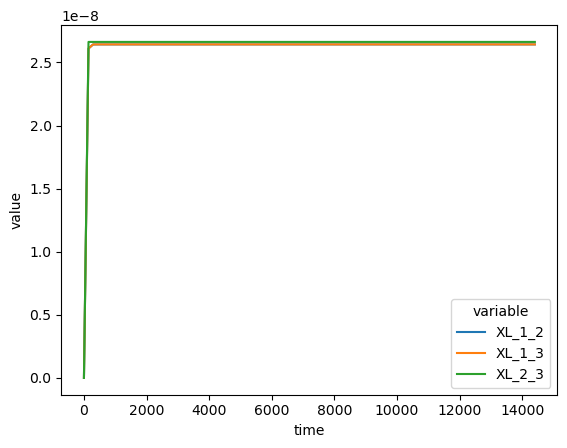

In [13]:
sns.lineplot(data=df_melt_3lys_lower_klys1[df_melt_3lys_lower_klys1["variable"].str.contains("XL")], x="time", y='value', hue='variable')


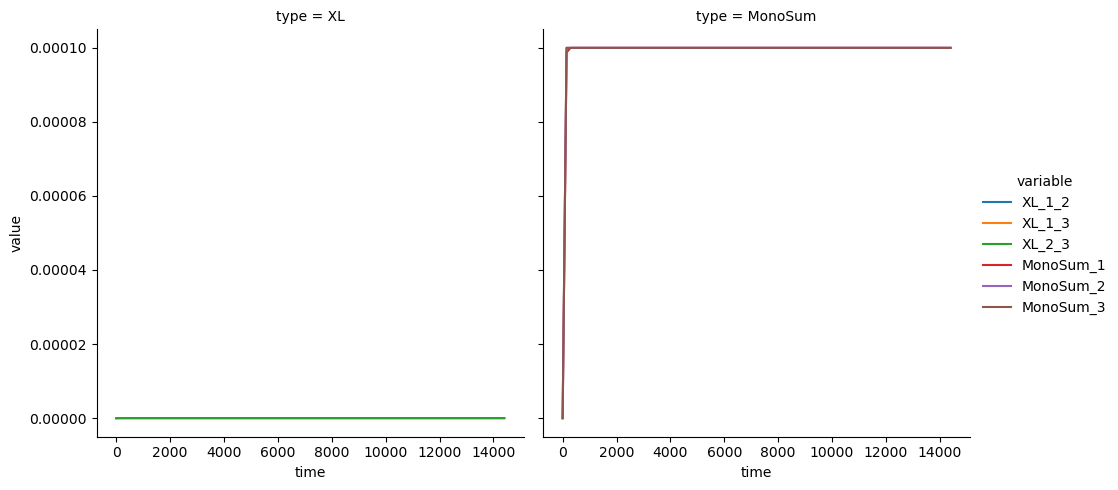

In [14]:
sns.relplot(data=df_melt_3lys_lower_klys1[df_melt_3lys_lower_klys1["type"].str.contains("XL|MonoSum")], x="time", y='value', hue='variable', kind='line', col='type')


In [15]:
def get_3lys_time_plot(df, time_limit, invert_colors=False):
    def get_chart(df, time_limit, invert_colors, linker_lys_plot):
        if invert_colors:
            colors_links = ['#9cc8e2', '#9cc8e2', '#2978b8', '#a5e863',  '#29924a', '#29924a']
            colors_linker_lys = ['#4b003f', '#a92c95', '#f911d4', '#df4800', '#df4800', '#a3151a']
        else:
            colors_links = ['#9cc8e2', '#2978b8', '#2978b8', '#a5e863',  '#a5e863', '#29924a']
            colors_linker_lys = ['#4b003f', '#a92c95', '#f911d4', '#df4800', '#a3151a', '#a3151a']
        if linker_lys_plot:
            colors = colors_linker_lys
            y_limit = alt.Scale()
        else:
            colors = colors_links
            y_limit = alt.Scale(domain=[0,1])
        c = alt.Chart(df).mark_line(size=3).encode(
            tooltip=['value', 'variable'],
            color=alt.Color('variable', title='Species', scale=alt.Scale(range=colors), legend=alt.Legend(labelFontSize=12)),
            # opacity=alt.Opacity('variable:O', legend=None),
            y=alt.Y("value", axis=alt.Axis(title='Concentration/M'), scale=y_limit),
            x=alt.X('time', title='Time/min', scale=alt.Scale(domain=[0,time_limit])),
        )
        c = c.facet(
            facet=alt.Facet('type', title=None, header=alt.Header(labelFontSize=14)),
            columns=2
        ).resolve_scale(
            y='independent',
        )
        return c
    df = df.copy()
    df["time"] /= 60
    df = df[df["time"].round(1) <= time_limit]
    df.loc[df["type"].str.contains("Crosslinker"), "type"] = "Crosslinker"
    df_linker_lys = df[(df["variable"].str.contains("LYS")) | (df["type"] == "Crosslinker")]
    df_links = df[df["variable"].str.contains("XL|MonoSum")]
    c_ll = get_chart(df_linker_lys, time_limit=time_limit, invert_colors=invert_colors, linker_lys_plot=True)
    c_l = get_chart(df_links, time_limit=time_limit, invert_colors=invert_colors, linker_lys_plot=False)
    return (c_ll & c_l).configure_axis(labelFontSize=12, titleFontSize=12).resolve_scale(color='independent', x='shared')


In [16]:
c = get_3lys_time_plot(df_melt_3lys_lower_klys1, 240)
c

alt.VConcatChart(...)

In [15]:
c.save('plots/' + '3lys_time_lower_klys_1.png', scale_factor=2)

In [16]:
c = get_3lys_time_plot(df_melt_3lys_even_lower_klys1, 240)
c

alt.VConcatChart(...)

In [17]:
c = get_3lys_time_plot(df_melt_3lys_even_lower_klys1, 240)
c

alt.VConcatChart(...)

In [17]:
c.save('plots/' + '3lys_time_even_lower_klys_1.png', scale_factor=2)

In [18]:
c = get_3lys_time_plot(df_melt_3lys_lower_klys1_2, 240, invert_colors=True)
c


alt.VConcatChart(...)

In [19]:
c.save('plots/' + '3lys_time_lower_klys_1_2.png', scale_factor=2)

In [20]:
c = get_3lys_time_plot(df_melt_3lys_lower_klys1_high_kh, 30)
c


alt.VConcatChart(...)

In [83]:
c = get_3lys_time_plot(df_melt_3lys_lower_klys1_low_kh, 120)
c


alt.VConcatChart(...)

In [22]:
c.save('plots/' + '3lys_time_lower_klys_1_high_kh.png', scale_factor=2)

In [23]:
get_xl_mono_plot(df_melt_3lys_last_tp)


NameError: name 'get_xl_mono_plot' is not defined

In [24]:
get_xl_mono_plot(df_melt_3lys_high_kh_last_tp)

NameError: name 'get_xl_mono_plot' is not defined

In [54]:
get_xl_mono_plot(df_melt_3lys_lower_klys1_high_kh_last_tp)

alt.HConcatChart(...)

In [55]:
get_xl_mono_plot(df_melt_3lys_lower_klys1_2_high_kh_last_tp)


alt.HConcatChart(...)

In [43]:
df_explore_3lys_3xl_klys = sbml_sim_helper.explore_variable(rr_3lys, 'klys_1', var_range=[1e-3, 1e-2, 1e-1], custom_vars=params_3lys_3xl, min_simulation_time=1e8)
df_explore_3lys_3xl_klys_high_kh = sbml_sim_helper.explore_variable(rr_3lys, 'klys_1', var_range=[1e-3, 1e-2, 1e-1], custom_vars=params_3lys_3xl_high_kh, min_simulation_time=1e8)
df_explore_3lys_3xl_klys_low_kh= sbml_sim_helper.explore_variable(rr_3lys, 'klys_1', var_range=[1e-3, 1e-2, 1e-1], custom_vars=params_3lys_3xl_low_kh, min_simulation_time=1e8)


Simulation for klys_1=0.001 took 0 seconds with a convergence of 1.4156435452657521e-21.
Simulation for klys_1=0.01 took 0 seconds with a convergence of 4.441968114211917e-25.
Simulation for klys_1=0.1 took 0 seconds with a convergence of 3.727217583049977e-27.
Simulation for klys_1=0.001 took 0 seconds with a convergence of 2.235743936303576e-31.
Simulation for klys_1=0.01 took 0 seconds with a convergence of 1.0186588852886472e-33.
Simulation for klys_1=0.1 took 0 seconds with a convergence of 8.581740475673868e-34.
Simulation for klys_1=0.001 took 0 seconds with a convergence of 2.618341223393842e-27.
Simulation for klys_1=0.01 took 0 seconds with a convergence of 1.3885250871411973e-22.
Simulation for klys_1=0.1 took 0 seconds with a convergence of 2.168404679419534e-21.


In [34]:
c = alt.Chart(df_explore_3lys_3xl_klys).mark_point().encode(
    x=alt.X("klys_1", scale=alt.Scale(base=10, type='log'), axis=alt.Axis(tickCount=6, format=".1e")),
    y=f'max(value)',
    color='variable'
)
#c_error_bars =
c += c.mark_line() + c.mark_errorbar(extent='ci', opacity=0.5)

c = c.facet(column=sbml_constants.S_LINK_TYPE).resolve_scale(y='independent')
c


alt.FacetChart(...)

In [20]:
def get_bar_plot_rel_inc(df, col_condition='condition', val_col='value'):
    colors_links = ['#9cc8e2', '#5ba3cf', '#2978b8', '#a0d89b',  '#60ba6c', '#29924a']
    colors_links_short = ['#5ba3cf',  '#60ba6c']
    base = alt.Chart(df).mark_bar().encode(
        x=alt.X(val_col,axis=alt.Axis(title='Concentration/M')),
    )
    bars = base.encode(
        tooltip=[val_col, 'variable'],
        color=alt.Color('variable', title='Link', scale=alt.Scale(range=colors_links), legend=None),
       # opacity=alt.Opacity('variable:O', legend=None),
        y='variable',
    )
    text = base.mark_text(
        dx=0,
       # dy=15,
        align='right',
        angle=0,
        fontStyle='bold',
        color='black',
        xOffset=30
    ).encode(
        y='variable',
        text=alt.Text('value_ref_ratio',format='.0%'),
    )
    rule = base.mark_rule(size=2).encode(
        color=alt.Color(sbml_constants.S_LINK_TYPE, legend=None, scale=alt.Scale(range=colors_links_short)),
        #stroke=alt.Stroke('type', legend=None, scale=alt.Scale(range=colors_links_short)),
        x=alt.X("value_ref_mean_t:Q"),
       # color=alt.Color('type',legend=None,scale=alt.Scale(range=['black']) ),
    ).transform_aggregate(
        value_ref_mean_t='mean(value_ref)',
        groupby=[sbml_constants.S_LINK_TYPE]
    )

    rule_border = rule.mark_rule(size=4).encode(color=alt.value('grey'))

    bar_chart = (bars+rule_border+rule+text).resolve_scale(
        color='independent',
    ).properties(
        width=400,
    ).facet(
        row=alt.Row(col_condition, header=alt.Header(labelAngle=0), sort='descending')
    )
    

    
    
    return bar_chart

In [44]:
def get_rel_df(df_melt, ref, ref_value, val_col='value', scale_factor=1):
    df_melt[val_col] *= scale_factor
    df_ref = df_melt[df_melt[ref] == ref_value]
    df_ref = df_ref[["variable", val_col]]
    df_ref = df_ref.rename(columns={val_col: 'value_ref'})
    df_merge = pd.merge(df_melt, df_ref, on=["variable"])
    #df_merge = df_merge.rename(index=str, columns={'value': 'value_org', 'value_ref_ratio': 'value'})
    df_merge['value_ref_mean'] = df_merge.groupby([sbml_constants.S_LINK_TYPE])['value_ref'].transform('mean')
    df_merge['value_ref_ratio'] = df_merge['value']/df_merge['value_ref']
    return df_merge

In [45]:
df_ref_3lys = get_rel_df(df_explore_3lys_3xl_klys, "klys_1", 0.1)
df_ref_3lys_high_kh = get_rel_df(df_explore_3lys_3xl_klys_high_kh, "klys_1", 0.1)
df_ref_3lys_low_kh = get_rel_df(df_explore_3lys_3xl_klys_low_kh, "klys_1", 0.1)

In [46]:
def get_3_cond_rel_df(df_a, df_b, df_c, scale_factor=1):
    df_a['cond'] = 3
    df_b['cond'] = 2
    df_c['cond'] = 1
    df_concat = pd.concat([df_a, df_b, df_c])
    df_concat = df_concat.rename(columns={'type': sbml_constants.S_LINK_TYPE})
    df_concat = df_concat[(df_concat[sbml_constants.S_LINK_TYPE].str.contains("MonoHydro|XL")) & ~(df_concat[sbml_constants.S_LINK_TYPE].str.contains("Crosslinker"))]
    return get_rel_df(df_concat, 'cond', 3, scale_factor=scale_factor)

In [38]:
mw = getattr(rr_3lys, sbml_constants.S_MOLECULAR_WEIGHT)

In [39]:
df_ref_3lys_kh_normal_lys1_2 = get_3_cond_rel_df(df_melt_3lys_last_tp, df_melt_3lys_lower_klys1_last_tp, df_melt_3lys_lower_klys1_2_last_tp)
df_ref_3lys_kh_high_lys1_2 = get_3_cond_rel_df(df_melt_3lys_high_kh_last_tp, df_melt_3lys_lower_klys1_high_kh_last_tp, df_melt_3lys_lower_klys1_2_high_kh_last_tp)
df_ref_3lys_kh_low_lys1_2 = get_3_cond_rel_df(df_melt_3lys_low_kh_last_tp, df_melt_3lys_lower_klys1_low_kh_last_tp, df_melt_3lys_lower_klys1_2_low_kh_last_tp, scale_factor=mw)

In [28]:
c = get_bar_plot_rel_inc(df_ref_3lys, col_condition='klys_1')
c

alt.FacetChart(...)

In [29]:
c.save('plots/' + '3lys_bar_rel_kh_standard.png', scale_factor=2)

WARN row encoding should be discrete (ordinal / nominal / binned).


In [30]:
c = get_bar_plot_rel_inc(df_ref_3lys_kh_normal_lys1_2, col_condition='cond')
c

alt.FacetChart(...)

In [31]:
c.save('plots/' + '3lys_bar_rel_lower_klys_1_2_kh_standard.png', scale_factor=2)

WARN row encoding should be discrete (ordinal / nominal / binned).


In [32]:
c = get_bar_plot_rel_inc(df_ref_3lys_high_kh, col_condition='klys_1')
c


alt.FacetChart(...)

In [33]:
c.save('plots/' + '3lys_bar_rel_kh_high.png', scale_factor=2)

WARN row encoding should be discrete (ordinal / nominal / binned).


In [107]:
c = get_bar_plot_rel_inc(df_ref_3lys_kh_high_lys1_2, col_condition='cond')
c


alt.FacetChart(...)

In [35]:
c.save('plots/' + '3lys_bar_rel_lower_klys_1_2_high_kh.png', scale_factor=2)

WARN row encoding should be discrete (ordinal / nominal / binned).


This is the version used in the paper

In [141]:
c = get_bar_plot_rel_inc(df_ref_3lys_kh_low_lys1_2, col_condition='cond')
c


alt.FacetChart(...)

In [142]:
c.save('plots/' + '3lys_bar_rel_lower_klys_1_2_low_kh.png', scale_factor=2)

WARN row encoding should be discrete (ordinal / nominal / binned).
